In [27]:
import numpy as np
import pandas as pd

In [28]:
from scipy.stats import multivariate_normal

1. The code is implemented below:

In [29]:
def expectation_step(X, means, covs, pis, k):
    n, d = X.shape
    likelihoods = np.zeros((n, k))
    posteriors = np.zeros((n, k))

    for j in range(k):
        likelihoods[:, j] = multivariate_normal.pdf(X, mean=means[j], cov=covs[j])

    for j in range(k):
        posteriors[:, j] = pis[j] * likelihoods[:, j]

    posteriors /= np.sum(posteriors, axis=1, keepdims=True)
    return posteriors

In [30]:
def maximization_step(X, posteriors, k):
    n, d = X.shape
    means = np.zeros((k, d))
    covs = np.zeros((k, d, d))
    pis = np.zeros(k)

    for j in range(k):
        Nj = np.sum(posteriors[:, j])
        means[j] = np.sum(X * posteriors[:, j][:, np.newaxis], axis=0) / Nj
        covs[j] = ((X - means[j]) * posteriors[:, j][:, np.newaxis]).T @ (X - means[j]) / Nj
        pis[j] = Nj / n

    return means, covs, pis

In [31]:
def EM(X, k, max_iter=300, tol=1e-6):
    """Run the EM algorithm for k-finite Gaussian mixture model"""

    n, d = X.shape
    means = np.random.rand(k, d) * np.std(X, axis=0) + np.mean(X, axis=0)
    covs = np.tile(np.diag(np.var(X, axis=0)), (k, 1, 1))
    pis = np.ones(k) / k

    for i in range(max_iter):
        prev_means = means.copy()

        posteriors = expectation_step(X, means, covs, pis, k)
        means, covs, pis = maximization_step(X, posteriors, k)

        if np.linalg.norm(means - prev_means) < tol:
            break

    return posteriors, means, covs, pis

In [32]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [33]:
df = pd.DataFrame(california_housing.frame)

In [34]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [35]:
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=2)
pca.fit(df[:-1])
df=pca.transform(df[:-1])

In [38]:
df

array([[-1103.51457206,     8.588843  ],
       [  975.53934379,    -4.65591172],
       [ -929.551807  ,    20.04711148],
       ...,
       [-1069.4386439 ,   -13.96597804],
       [ -418.43940855,   -12.91943276],
       [ -684.44135651,   -12.80651432]])

In [39]:
# df=pd.DataFrame(df)
# df.columns=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
# df.head()

In [40]:
df.shape

(20639, 2)

3. The code is implemented below:

In [41]:
# Run the EM algorithm for k=2, 3, and 4
for k in range(2, 5):
    posteriors, means, covs, pis = EM(df, k)
    print(f"k={k}:")
    for j in range(k):
        print(f"  Component {j+1}:")
        print(f"    mean: {means[j]}")
        print(f"    covariance:\n{covs[j]}")
        print(f"    mixing coefficient: {pis[j]}")


k=2:
  Component 1:
    mean: [1529.79740349   -3.88578157]
    covariance:
[[3.67041744e+06 8.62162587e+03]
 [8.62162587e+03 1.32459154e+02]]
    mixing coefficient: 0.16139721474888857
  Component 2:
    mean: [-294.42430242    0.74785624]
    covariance:
[[ 2.85809040e+05 -2.95059683e+02]
 [-2.95059683e+02  1.44325923e+02]]
    mixing coefficient: 0.8386027852511114
k=3:
  Component 1:
    mean: [-431.04765556    3.15422343]
    covariance:
[[1.83523341e+05 2.26430450e+02]
 [2.26430450e+02 1.32364593e+02]]
    mixing coefficient: 0.6427911254345323
  Component 2:
    mean: [ 3.28877148e+03 -1.41090390e+00]
    covariance:
[[7.45587676e+06 1.77517661e+04]
 [1.77517661e+04 1.96878946e+02]]
    mixing coefficient: 0.04026022584198329
  Component 3:
    mean: [456.436479    -6.21773756]
    covariance:
[[7.68023385e+05 3.47068382e+03]
 [3.47068382e+03 1.05944033e+02]]
    mixing coefficient: 0.31694864872348427
k=4:
  Component 1:
    mean: [-484.36056134    2.8542524 ]
    covariance:


k=2: Silhouette Score = 0.7044520540195346
k=3: Silhouette Score = 0.5021830962803508
k=4: Silhouette Score = 0.15554119521176657


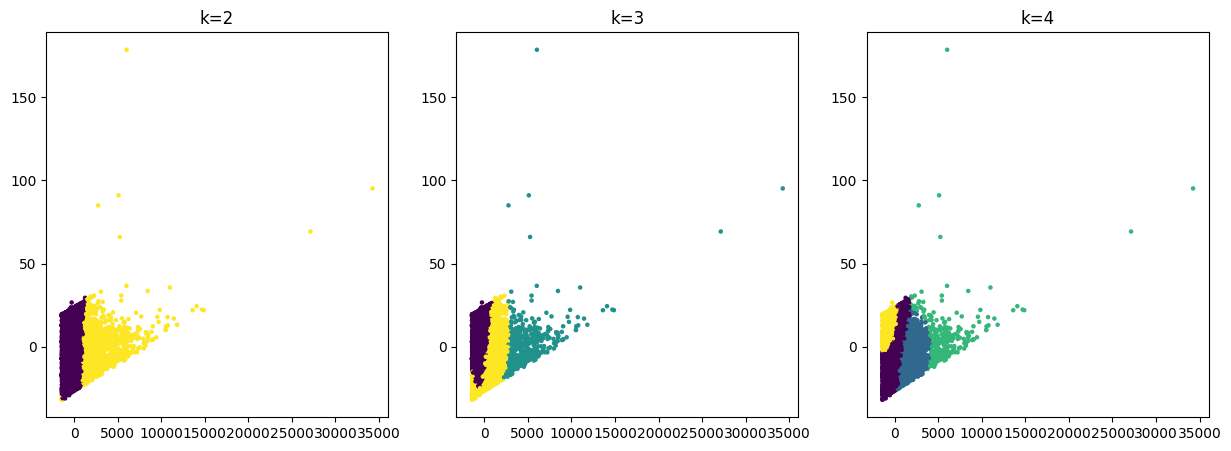

In [43]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate the Silhouette Score for k=2, 3, and 4
silhouette_scores = []
for k in range(2, 5):
    posteriors, _, _, _ = EM(df, k)
    cluster_labels = posteriors.argmax(axis=1)
    score = silhouette_score(df, cluster_labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score}")

# Plot the clusters for k=2, 3, and 4
plt.figure(figsize=(15, 5))
for i, k in enumerate(range(2, 5)):
    posteriors, _, _, _ = EM(df, k)
    cluster_labels = posteriors.argmax(axis=1)
    plt.subplot(1, 3, i+1)
    plt.scatter(df[:, 0], df[:, 1], c=cluster_labels, s=5, cmap='viridis')
    plt.title(f"k={k}")
plt.show()

# Plot the Silhouette Scores
plt.plot(range(2, 5), silhouette_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()


4. The Silhouetter Score tells us that for k=2, the clustering is better than other values. In fact, the score goes down as the value of k goes up